In [111]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [112]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [113]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [114]:
# cv2.cvtColor??

In [115]:
# def draw_landmarks(image, results):
#     #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [116]:
def draw_styled_landmarks(image, results):
    # Draw face connections (updated to FACEMESH_TESSELATION)
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_holistic.FACEMESH_TESSELATION,  # Corrected constant
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),  # Connection lines
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)  # Landmark points
        )

    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )

    # Draw hands (left and right)
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )

    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

In [117]:
#mp_holistic.FACE_CONNECTIONS

In [118]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()

        #make detection
        image,results=mediapipe_detection(frame,holistic)
        # print(results)

        draw_styled_landmarks(image,results)
        
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

In [119]:
# len(results.right_hand_landmarks.landmark)

In [120]:
results

mediapipe.python.solution_base.SolutionOutputs

In [121]:
draw_styled_landmarks(frame,results)

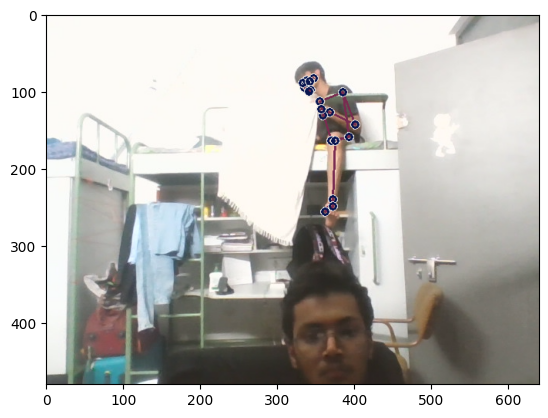

In [122]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [123]:
# len(results.pose_landmarks.landmark)

In [124]:
# pose = []
# for res in results.pose_landmarks.landmark:
#     test = np.array([res.x, res.y, res.z, res.visibility])
#     pose.append(test)

In [125]:
# pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
# face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
# lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
# rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [126]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [127]:
result_test = extract_keypoints(results)

In [128]:
result_test

array([ 0.52479792,  0.19906153, -0.11202428, ...,  0.        ,
        0.        ,  0.        ])

In [129]:
np.save('0', result_test)

In [130]:
np.load('0.npy')

array([ 0.52479792,  0.19906153, -0.11202428, ...,  0.        ,
        0.        ,  0.        ])

In [131]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [132]:
# import os
# import numpy as np
# from pathlib import Path

# # Initialize path (using pathlib - recommended)
# DATA_PATH = Path('MP_Data')

# # Create directory if it doesn't exist
# DATA_PATH.mkdir(exist_ok=True)

# actions = np.array(['hello', 'thanks', 'iloveyou'])
# no_sequences = 30
# sequence_length = 30
# start_folder = 1

# for action in actions:
#     action_dir = DATA_PATH / action  # Uses pathlib's / operator
#     action_dir.mkdir(exist_ok=True)
    
#     # Create sequence directories
#     for seq in range(1, no_sequences + 1):
#         seq_dir = action_dir / str(seq)
#         seq_dir.mkdir(exist_ok=True)

In [133]:
# print(f"Data will be saved to: {DATA_PATH.absolute()}")

In [134]:
for action in actions: 
    dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(1,no_sequences+1):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
        except:
            pass

In [135]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.4, min_tracking_confidence=0.4) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences aka videos
#         for sequence in range(start_folder, start_folder+no_sequences):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(500)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [136]:
# cap.release()
# cv2.destroyAllWindows()

In [137]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [138]:
label_map = {label:num for num, label in enumerate(actions)}

In [139]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [140]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            try:
                # Corrected f-string syntax:
                file_path = os.path.join(DATA_PATH, action, str(sequence), f"{frame_num}.npy")
                res = np.load(file_path)
                window.append(res)
            except FileNotFoundError:
                # Fixed print statement (removed nested f-string):
                print(f"Missing file: {os.path.join(DATA_PATH, action, str(sequence), str(frame_num) + '.npy')}")
                break  # Skip incomplete sequences
        if len(window) == sequence_length:  # Only add complete sequences
            sequences.append(window)
            labels.append(label_map[action])

Missing file: MP_Data\hello\100\0.npy
Missing file: MP_Data\hello\101\0.npy
Missing file: MP_Data\hello\102\0.npy
Missing file: MP_Data\hello\103\0.npy
Missing file: MP_Data\hello\104\0.npy
Missing file: MP_Data\hello\105\0.npy
Missing file: MP_Data\hello\106\0.npy
Missing file: MP_Data\hello\107\0.npy
Missing file: MP_Data\hello\108\0.npy
Missing file: MP_Data\hello\109\0.npy
Missing file: MP_Data\hello\110\0.npy
Missing file: MP_Data\hello\111\0.npy
Missing file: MP_Data\hello\112\0.npy
Missing file: MP_Data\hello\113\0.npy
Missing file: MP_Data\hello\114\0.npy
Missing file: MP_Data\hello\115\0.npy
Missing file: MP_Data\hello\116\0.npy
Missing file: MP_Data\hello\117\0.npy
Missing file: MP_Data\hello\118\0.npy
Missing file: MP_Data\hello\119\0.npy
Missing file: MP_Data\hello\120\0.npy
Missing file: MP_Data\hello\121\0.npy
Missing file: MP_Data\hello\122\0.npy
Missing file: MP_Data\hello\123\0.npy
Missing file: MP_Data\hello\124\0.npy
Missing file: MP_Data\hello\125\0.npy
Missing file

In [141]:
np.array(sequences).shape

(177, 30, 1662)

In [142]:
np.array(labels).shape

(177,)

In [143]:
X = np.array(sequences)

In [144]:
X.shape

(177, 30, 1662)

In [145]:
y = to_categorical(labels).astype(int)

In [146]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [148]:
y_test.shape

(9, 3)

In [149]:
X_train.shape

(168, 30, 1662)

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [152]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\Users\SAHIL GUPTA\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [153]:
X.shape

(177, 30, 1662)

In [154]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [155]:
# model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])
# model.save('action2.keras')


In [156]:
# model.summary()

In [157]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step


In [158]:
actions[np.argmax(res[4])]

'hello'

In [159]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [160]:
# del model

In [161]:
model.load_weights('action1.keras')

In [162]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [163]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [164]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [165]:
ytrue

[2, 1, 2, 2, 2, 1, 2, 1, 2]

In [166]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[6, 0],
        [3, 0]],

       [[0, 3],
        [0, 6]]], dtype=int64)

In [167]:
accuracy_score(ytrue, yhat)

0.6666666666666666

Test in real time detection

In [168]:
from scipy import stats

In [169]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [170]:
def prob_viz(res, actions, input_frame, colors):
    """
    Visualizes prediction probabilities on the video frame.
    Args:
        res: Model predictions (probability array)
        actions: List of gesture names
        input_frame: Image/frame to draw on
        colors: List of BGR color tuples for each action
    Returns:
        Modified frame with probability bars
    """
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        # Draw probability bar
        cv2.rectangle(output_frame, (0, 60+num*40), (int(prob*100), 90+num*40),
                      colors[num], -1)
        # Add action label and probability text
        cv2.putText(output_frame, f'{actions[num]} {prob:.2f}', 
                    (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, 
                    (255,255,255), 2, cv2.LINE_AA)
    return output_frame

In [171]:

import cv2
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.2

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.4, min_tracking_confidence=0.4) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

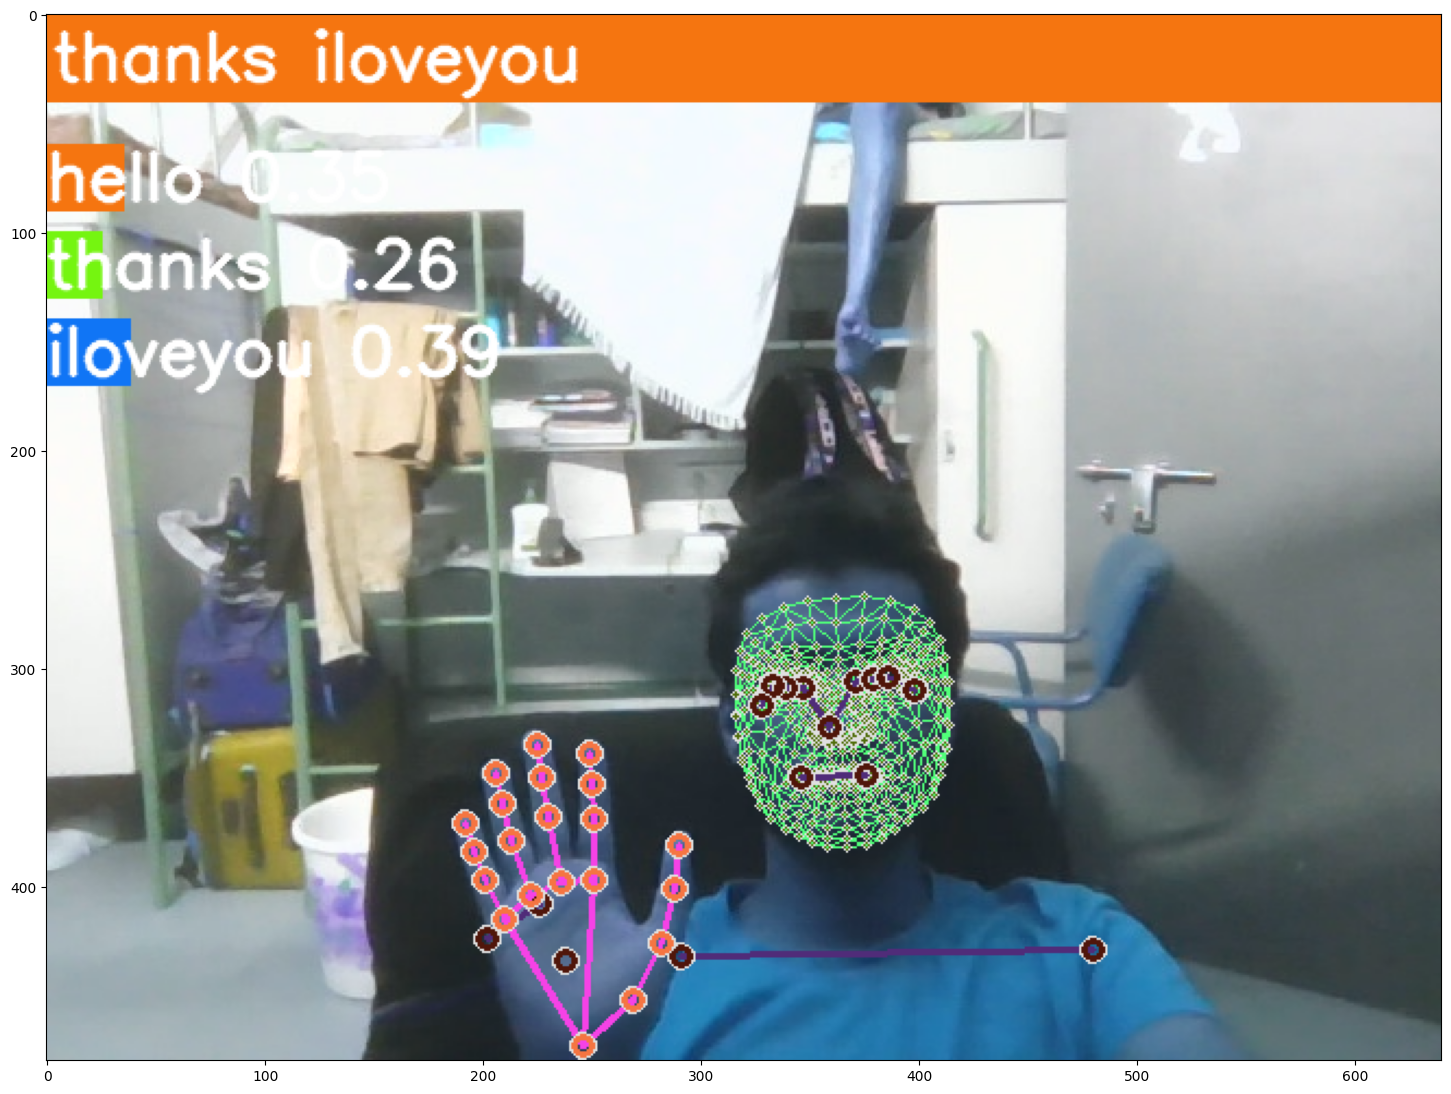

In [172]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))